In [1]:
#데이터 준비 및 나누기 
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import warnings
titanic_df = sns.load_dataset('titanic')
# 데이터 확인
titanic_df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [7]:
# 필요한 특성 선택 및 결측치 처리
features = ['pclass', 'sex' , 'age', 'sibsp', 'parch', 'fare' , 'embarked']
X = titanic_df[features]
y = titanic_df['survived']

# 범주형 변수를 더미 변수로 변환
X = pd.get_dummies(X, columns=['sex', 'embarked'], drop_first=True)

# 결측치 처리 (예: 평균값으로 대체)
X['age'].fillna(X['age'].mean(), inplace=True)

# 훈련 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 데이터 표준화
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [13]:
print(X_train_scaled.shape)
print(y_train.shape)

(712, 8)
(712,)


In [17]:
from sklearn.model_selection import GridSearchCV

# 로지스틱 회귀 모델 생성
logreg_model = LogisticRegression()

params = {
    'C': [1,1.5,2,2.5],
    'penalty':['l1', 'l2', 'elasticnet', 'none'],
    'solver': ['saga'],
}

gs = GridSearchCV(logreg_model, params, n_jobs=-1)
gs.fit(X_train_scaled,y_train)


# 예측 및 성능 평가
# y_pred_logreg = logreg_model.predict(X_test_scaled)
# accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
# f1_logreg = f1_score(y_test, y_pred_logreg)

# print("로지스틱 회귀 정확도:", accuracy_logreg)
# print("분류 보고서:\n", classification_report(y_test, y_pred_logreg))
# print("혼동 행렬:\n", confusion_matrix(y_test, y_pred_logreg))
# print("F1-score:", f1_logreg)
# print("ROC AUC:", roc_auc)

C:\Users\LG\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
20 fits failed out of a total of 80.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\LG\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\LG\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1471, in fit
    raise ValueError(
ValueError: l1_ratio must be between 0 and 1; got (l1_ratio=None)

  warnings.warn(some_fits_failed_message, FitFailedWarning)
C:\Users\LG\anaconda3\lib\site-packages\sklearn\model_selection\_

GridSearchCV(estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [1, 1.5, 2, 2.5],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['saga']})

In [22]:
lr = gs.best_estimator_
print(lr.score(X_train_scaled,y_train))
print(lr.score(X_test_scaled,y_test))

0.7991573033707865
0.8044692737430168


In [26]:
gs.best_params_

{'C': 1, 'penalty': 'l1', 'solver': 'saga'}

In [27]:
#GridSearchCV정의 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

params = {
    'min_impurity_decrease': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005],
    'max_depth': range(5, 20, 1),
    'min_samples_split': range(2, 100, 10)
}
gs = GridSearchCV(DecisionTreeClassifier(random_state=42), params, n_jobs=-1)
gs.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': range(5, 20),
                         'min_impurity_decrease': [0.0001, 0.0002, 0.0003,
                                                   0.0004, 0.0005],
                         'min_samples_split': range(2, 100, 10)})

In [28]:
# 결정 트리 모델 생성
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train_scaled, y_train)

# 예측 및 성능 평가
y_pred_dt = dt_model.predict(X_test_scaled)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)

print("결정 트리 정확도:", accuracy_dt)
print("분류 보고서:\n", classification_report(y_test, y_pred_dt))
print("혼동 행렬:\n", confusion_matrix(y_test, y_pred_dt))
print("F1-score:", f1_dt)

결정 트리 정확도: 0.7821229050279329
분류 보고서:
               precision    recall  f1-score   support

           0       0.81      0.83      0.82       105
           1       0.75      0.72      0.73        74

    accuracy                           0.78       179
   macro avg       0.78      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179

혼동 행렬:
 [[87 18]
 [21 53]]
F1-score: 0.7310344827586208


In [29]:
dt = gs.best_estimator_
dt.score(X_train, y_train)

0.8609550561797753

In [30]:
gs.best_params_

{'max_depth': 6, 'min_impurity_decrease': 0.0002, 'min_samples_split': 12}

In [31]:
gs.cv_results_['mean_test_score']

array([0.80476706, 0.81039102, 0.80616567, 0.80053186, 0.80053186,
       0.79912341, 0.79630651, 0.79630651, 0.80895302, 0.79486851,
       0.80756427, 0.81318822, 0.80616567, 0.80053186, 0.80053186,
       0.79912341, 0.79630651, 0.79630651, 0.80895302, 0.79486851,
       0.80756427, 0.81318822, 0.80616567, 0.80053186, 0.80053186,
       0.79912341, 0.79630651, 0.79630651, 0.80895302, 0.79486851,
       0.80897272, 0.81318822, 0.80616567, 0.80053186, 0.80053186,
       0.79912341, 0.79630651, 0.79630651, 0.80895302, 0.79486851,
       0.80897272, 0.81318822, 0.80616567, 0.80053186, 0.80053186,
       0.79912341, 0.79630651, 0.79630651, 0.80895302, 0.79486851,
       0.80474737, 0.81460652, 0.80757412, 0.80475721, 0.80196001,
       0.79351916, 0.79211071, 0.79350931, 0.80615582, 0.79207131,
       0.80614597, 0.81600512, 0.80757412, 0.80475721, 0.80196001,
       0.79351916, 0.79211071, 0.79350931, 0.80615582, 0.79207131,
       0.80755442, 0.81600512, 0.80757412, 0.80475721, 0.80196

In [32]:
import numpy as np

best_index = np.argmax(gs.cv_results_['mean_test_score'])
gs.cv_results_['params'][best_index]

{'max_depth': 6, 'min_impurity_decrease': 0.0002, 'min_samples_split': 12}

In [33]:
range(2, 100, 10)

range(2, 100, 10)

In [34]:
params = {'min_impurity_decrease': np.arange(0.0001, 0.001, 0.0001),
          'max_depth': range(5, 20, 1),
          'min_samples_split': range(2, 100, 10)
          }

In [35]:
gs = GridSearchCV(DecisionTreeClassifier(random_state=42), params, n_jobs=-1)
gs.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': range(5, 20),
                         'min_impurity_decrease': array([0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008,
       0.0009]),
                         'min_samples_split': range(2, 100, 10)})

In [36]:
gs.best_params_

{'max_depth': 6,
 'min_impurity_decrease': 0.0007000000000000001,
 'min_samples_split': 12}

In [37]:
np.max(gs.cv_results_['mean_test_score'])

0.8188023244361272

In [38]:
dt = gs.best_estimator_

dt.score(X_test, y_test)

0.8100558659217877

In [39]:
#SPIPY
from scipy.stats import uniform, randint
rgen = randint(0, 10)
rgen.rvs(10)


# 샘플링 갯수를 늘려서 고르게 가져오는 것 확인
np.unique(rgen.rvs(1000), return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([ 90,  89,  94,  96, 113,  92, 111, 113,  89, 113], dtype=int64))

In [40]:
# 0 ~ 1 사이의 10개 실수를 추출
ugen = uniform(0, 1)
ugen.rvs(10)

array([0.76002166, 0.15609087, 0.18069064, 0.53564306, 0.97284253,
       0.08323118, 0.23985906, 0.17550565, 0.01960609, 0.41622431])

In [41]:
#min_samples_leaf 매개 변수 사용 

from sklearn.model_selection import RandomizedSearchCV

params = {'min_impurity_decrease': uniform(0.0001, 0.001),
          'max_depth': randint(20, 50),
          'min_samples_split': randint(2, 25),
          'min_samples_leaf': randint(1, 25),
          }

gs = RandomizedSearchCV(DecisionTreeClassifier(random_state=42), params, 
                        n_iter=100, n_jobs=-1, random_state=42)
gs.fit(X_train, y_train)

RandomizedSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002603A30ED60>,
                                        'min_impurity_decrease': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002603B8F3F40>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002603A7DDF40>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002603B8F3E20>},
                   random_state=42)

In [42]:
gs.best_params_

{'max_depth': 37,
 'min_impurity_decrease': 0.0010488855372533332,
 'min_samples_leaf': 14,
 'min_samples_split': 19}

In [43]:
np.max(gs.cv_results_['mean_test_score'])

0.8201910765291048

In [44]:
dt = gs.best_estimator_

dt.score(X_test, y_test)

0.7932960893854749

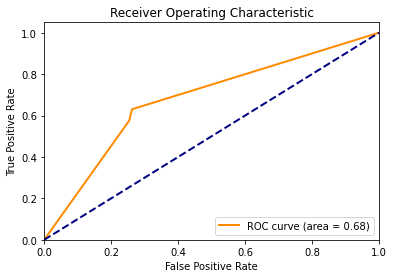

AUC: 0.68


In [4]:
# 필요한 라이브러리 임포트
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt


# 데이터 로드 및 전처리
# 타이타닉 데이터셋 로드 (이 예시에서는 seaborn 라이브러리를 사용하여 데이터셋을 로드합니다.)

import seaborn as sns
data = sns.load_dataset('titanic')

# 결측값 처리 및 필요없는 열 제거
data = data.dropna(subset=['age', 'fare', 'embarked'])
data = data.drop(columns=['deck', 'embark_town', 'alive', 'class', 'who', 'adult_male', 'parch', 'sibsp', 'alone'])

# 범주형 변수 변환
data['sex'] = data['sex'].map({'male': 0, 'female': 1})
data = pd.get_dummies(data, columns=['embarked'])

# 특징과 레이블 분리
X = data.drop(columns=['survived'])
y = data['survived']

# 학습 데이터와 테스트 데이터로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 결정 트리 모델 생성 및 학습
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# 예측 확률 계산
y_proba = model.predict_proba(X_test)[:, 1]

# ROC 곡선 계산
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

# AUC 계산
roc_auc = auc(fpr, tpr)

# ROC 곡선 그리기
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# AUC 값 출력
print(f'AUC: {roc_auc:.2f}')

In [75]:
#mpg 연비 예측 모델 생성 
import pandas as pd 
import seaborn as sns

mpg = sns.load_dataset("mpg")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [92]:
mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [100]:
# NaN 값 평균치로 채움
#df['horsepower'] = df['horsepower'].fillna(df['horsepower'].mean())
#df.describe()

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


In [77]:
mpg.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [78]:
# 결측치 처리 (NaN 값 처리)
data = data.dropna()
# 무한대 값 처리 (무한대 값을 NaN으로 변환한 후 제거)
data.replace([np.inf, -np.inf], np.nan, inplace=True)
data = data.dropna()

data

,survived,pclass,sex,age,fare,embarked_C,embarked_Q,embarked_S
0,0,3,0,22.0,7.2500,0,0,1
1,1,1,1,38.0,71.2833,1,0,0
2,1,3,1,26.0,7.9250,0,0,1
3,1,1,1,35.0,53.1000,0,0,1
4,0,3,0,35.0,8.0500,0,0,1
...,...,...,...,...,...,...,...,...
885,0,3,1,39.0,29.1250,0,1,0
886,0,2,0,27.0,13.0000,0,0,1
887,1,1,1,19.0,30.0000,0,0,1
889,1,1,0,26.0,30.0000,1,0,0


In [97]:
mpg_notnull
X = mpg[['cylinders', 'displacement','horsepower','weight','acceleration']]
y = mpg['mpg'].to_numpy()
from sklearn.model_selection import train_test_split

# train_input, test_input, train_target, test_target
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [101]:
X_train.shape, X_test.shape

((318, 5), (80, 5))

In [102]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(X_train)

X_train_scaled = ss.transform(X_train)
X_test_scaled = ss.transform(X_test)

In [103]:
X_train_scaled

array([[ 1.52718818,  1.0901965 ,  1.26183446,  0.55282624, -1.31933367],
       [-0.85051483, -0.92299623, -0.41351298, -0.99966729, -0.41318225],
       [-0.85051483, -0.98134964, -0.95394763, -1.1247723 ,  0.92792185],
       ...,
       [-0.85051483, -0.56315019, -0.22436085, -0.54094894, -0.30444408],
       [-0.85051483, -1.00080078, -1.11607803, -1.09498539,  0.60170734],
       [-0.85051483, -0.92299623, -1.54842576, -1.21413301,  1.94281144]])

In [104]:
X_test_scaled

array([[-0.85051483, -0.98134964, -1.35927363, -1.39881183,  0.63795339],
       [-0.85051483, -0.69930815, -0.65670857, -0.40988656,  1.07290607],
       [ 0.33833667,  0.38995555, -0.08925218, -0.39916327, -0.9568731 ],
       [ 1.52718818,  1.22635446,  1.26183446,  1.15690469, -0.88438099],
       [ 1.52718818,  1.22635446,  1.26183446,  1.51077313, -0.41318225],
       [-0.85051483, -0.92299623, -0.41351298, -1.03541158,  0.31173888],
       [-0.85051483, -0.50479678, -0.30542605, -0.12393226,  0.27549283],
       [ 1.52718818,  2.41287384,  3.01824709,  2.10412829, -1.68179423],
       [ 1.52718818,  0.66227147,  0.18096514,  1.29988184,  1.2178903 ],
       [ 0.33833667,  0.07873735,  0.03151842, -0.1120175 ,  0.49296917],
       [ 1.52718818,  1.92659541,  2.34270377,  1.04967183, -2.58794565],
       [-0.85051483, -0.98134964, -0.98096937, -1.19626087, -0.23195197],
       [-0.85051483, -0.98134964, -0.89990417, -1.20817563,  1.76158115],
       [ 1.52718818,  1.0901965 ,  1.2

In [105]:
y_train

array([16. , 27. , 37. , 36.1, 23. , 14. , 32.8, 29.9, 20. , 12. , 15.5,
       23.7, 24. , 36. , 19. , 38. , 29. , 21.5, 27.9, 14. , 36.1, 22. ,
       18. , 17. , 18. , 14. , 26. , 13. , 33. , 37. , 32. , 28. , 19.2,
       32. , 27.4, 20. , 26. , 20.6, 37.3, 16.2, 15. , 21. , 21. , 20.5,
       21. , 25.4, 34.1, 27. , 36. , 31.6, 38.1, 32. , 40.8, 19. , 20. ,
       22. , 17.5, 35.1, 30.5, 33.7, 19. , 14. , 15.5, 15. , 22.5, 29. ,
       23. , 18. , 25.5, 24. , 14. , 16.5, 20.3, 26. , 15. , 33.8, 11. ,
       28. , 19. , 30. , 27.2, 16.5, 29. , 20. , 15. , 17.5, 18. , 24. ,
       20.2, 13. , 12. , 20. , 13. , 26. , 34.5, 18. , 18.5, 13. , 26. ,
       18. , 31. , 24. , 11. , 19.4, 32.9, 31.5, 19.1, 24. , 20. , 28. ,
       29. , 14. , 35. , 29.5, 23.6, 15.5, 20.6, 34.2, 25. , 36.4, 22.3,
       19. , 19.8, 31. , 14. , 14. , 43.4, 26. , 33.5, 19. , 22. , 27.2,
       32.7, 29. , 17.6, 23. , 34. , 17.6, 30.7, 21. , 38. , 16. , 15. ,
       20. , 29. , 32. , 18. , 32. , 15. , 16. , 34

In [114]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 데이터 로드 및 전처리
mpg = sns.load_dataset("mpg")
mpg = mpg.dropna(subset=["horsepower"])  # 결측치 처리

# 특징과 레이블 설정
X = mpg[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration']]
y = mpg['mpg']

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


In [115]:
# 릿지 회귀 모델 설정 및 그리드 서치
ridge_params = {
    'alpha': [0.01, 0.1, 1, 10, 100],  # 정규화 강도
}

ridge = Ridge()
ridge_gs = GridSearchCV(ridge, ridge_params, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')
ridge_gs.fit(X_train, y_train)

print("릿지 회귀 최적의 파라미터:", ridge_gs.best_params_)
print("릿지 회귀 최고 성능 (MSE):", -ridge_gs.best_score_)

# 최적의 모델로 예측
ridge_best = ridge_gs.best_estimator_
y_pred_ridge = ridge_best.predict(X_test)

# 평가
ridge_mse = mean_squared_error(y_test, y_pred_ridge)
ridge_mae = mean_absolute_error(y_test, y_pred_ridge)
ridge_r2 = r2_score(y_test, y_pred_ridge)

print("릿지 회귀 평가 지표:")
print("Mean Squared Error (MSE):", ridge_mse)
print("Mean Absolute Error (MAE):", ridge_mae)
print("R-squared (R2):", ridge_r2)


릿지 회귀 최적의 파라미터: {'alpha': 100}
릿지 회귀 최고 성능 (MSE): 18.76518598292154
릿지 회귀 평가 지표:
Mean Squared Error (MSE): 17.999908436885946
Mean Absolute Error (MAE): 3.499106918941303
R-squared (R2): 0.647341247017196


In [116]:
# 라쏘 회귀 모델 설정 및 그리드 서치
lasso_params = {
    'alpha': [0.01, 0.1, 1, 10, 100],  # 정규화 강도
}

lasso = Lasso()
lasso_gs = GridSearchCV(lasso, lasso_params, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')
lasso_gs.fit(X_train, y_train)

print("라쏘 회귀 최적의 파라미터:", lasso_gs.best_params_)
print("라쏘 회귀 최고 성능 (MSE):", -lasso_gs.best_score_)

# 최적의 모델로 예측
lasso_best = lasso_gs.best_estimator_
y_pred_lasso = lasso_best.predict(X_test)

# 평가
lasso_mse = mean_squared_error(y_test, y_pred_lasso)
lasso_mae = mean_absolute_error(y_test, y_pred_lasso)
lasso_r2 = r2_score(y_test, y_pred_lasso)

print("라쏘 회귀 평가 지표:")
print("Mean Squared Error (MSE):", lasso_mse)
print("Mean Absolute Error (MAE):", lasso_mae)
print("R-squared (R2):", lasso_r2)


라쏘 회귀 최적의 파라미터: {'alpha': 1}
라쏘 회귀 최고 성능 (MSE): 18.52345506866304
라쏘 회귀 평가 지표:
Mean Squared Error (MSE): 17.97318976230977
Mean Absolute Error (MAE): 3.505851530701927
R-squared (R2): 0.6478647260387935


In [117]:
gs.best_params_

{'max_depth': None, 'min_samples_leaf': 10, 'min_samples_split': 30}

In [118]:
np.max(gs.cv_results_['mean_test_score'])

0.7334085894144117

In [119]:
dt = gs.best_estimator_

dt.score(X_test, y_test)

0.6520514841304537